# Airline Passenger Satisfaction Analysis
## by David Berumen

## Investigation Overview

In this presentation I will go over the different factors that impact the satisfaction of the passengers of an US airline.
## Dataset Overview

The dataset contains around 130000 surveys made to passengers of an US airline. The survey includes the overall satisfaction, age, gender, flight distance and other additional information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# HTML to center visualizations

In [23]:
%%html
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>

In [2]:
# load in the dataset into a pandas dataframe
sat_df = pd.read_csv('satisfaction_2015.csv')

## How satisfied are the passengers?

The dataset contains information from 2015, the two possible responses for overall satisfaction are `satisfied` or `neutral or dissatisfied`. Of the **129880** surveys **73452** are `neutral or dissatisfied` and **56428** are `satisfied`. This means that 43% of the passengers are satisfied. 

<p style="text-align: center;">Use ▼ to view the results</p>

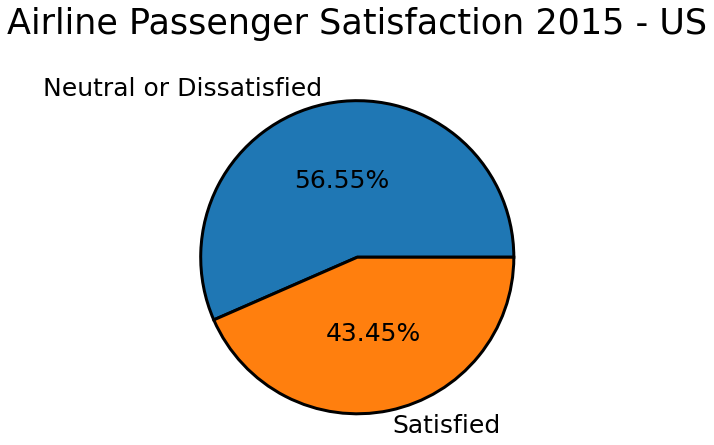

In [67]:
## Plot pie for satisfaction results
plt.pie(sat_df['satisfaction'].value_counts(), labels=['Neutral or Dissatisfied', 'Satisfied'], autopct='%.2f%%',
        radius=1.8, textprops={'fontsize': 25}, pctdistance=.5, wedgeprops={'lw': 3,'ls' : '-',"edgecolor":"k"})
plt.title('Airline Passenger Satisfaction 2015 - US',  x=0.5, y=1.5, fontdict={'fontsize': 35});

## Is there a difference in satisfaction depending on the travel class?
Usually there are different levels of service inside the airplane, for the surveys of this analysis there are 3 travel classes:

- Business
- Eco
- Eco Plus

Looking at the overall satisfaction for each class we find that there is an important difference when comparing **Business** to the other classes. 

<p style="text-align: center;">Use ▼ to view the results</p>

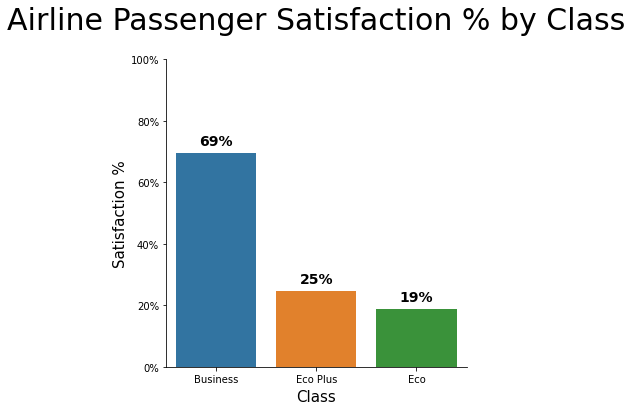

In [240]:
# Create column with numeric value for satisfaction
sat_df['satisfaction_num'] = sat_df['satisfaction'].replace(['satisfied','neutral or dissatisfied'],[1,0])
# Plot satisfaction by class
plot = sb.catplot(data=sat_df,x='class',y='satisfaction_num', kind='bar', order=['Business','Eco Plus','Eco'],ci=None,)
for i, bar in enumerate(plot.ax.patches):
    h = bar.get_height()
    plot.ax.text(
        i, # bar index (x coordinate of text)
        h+.04, # y coordinate of text
        '{:,.0%}'.format(h),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)
plot.ax.set_xlabel('Class', {'fontsize': 15}, labelpad=5) 
plot.ax.set_ylim(0,1)
plot.ax.set_ylabel('Satisfaction %', {'fontsize': 15}, labelpad=3) 
plot.ax.set_title('Airline Passenger Satisfaction % by Class',fontdict={'fontsize': 30},pad=30)
perc_values = plot.ax.get_yticks()
plot.ax.set_yticklabels(['{:,.0%}'.format(x) for x in perc_values]);

## Why do Business class passengers are more satisfied?
Now that we know that the passengers traveling in business class have a higher satisfaction, which factors could be influencing the final decision?

According to wikipedia [Business Class](https://en.wikipedia.org/wiki/Business_class) is distinguished from other travel classes by the quality of seating, food, drinks, ground service and other amenities. Let's take a look at how satisfied are the passengers of each class with the following aspects of their travel class:

- Seat Comfort
- In-flight Entertainment
- Leg Room Service

<p style="text-align: center;">Use ▼ to view the results</p>

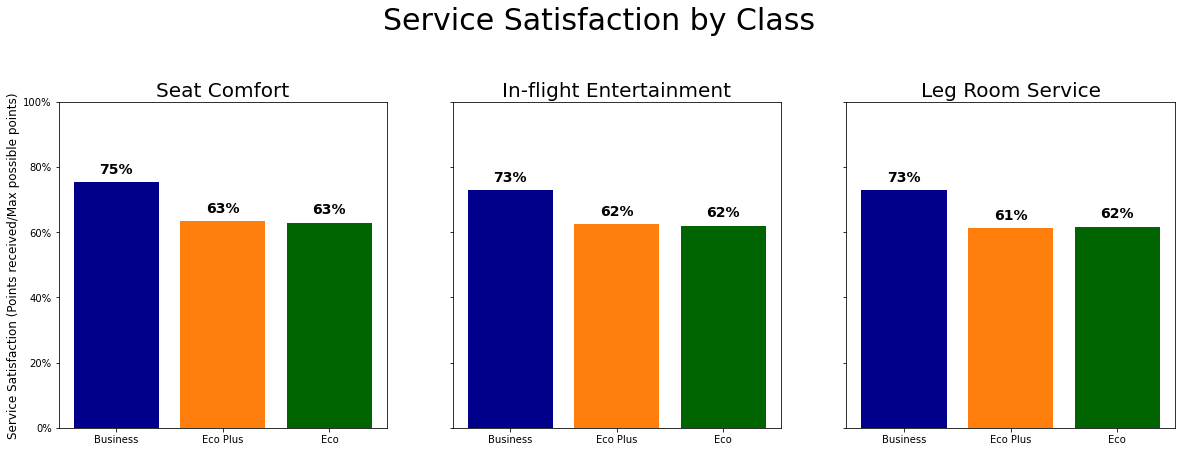

In [243]:
# Create variables for plot
seat_sat_business = np.sum(sat_df[sat_df['class'] == 'Business']['seat_comfort'])/(sat_df[sat_df['class'] == 'Business'].shape[0]*5)
seat_sat_eco = np.sum(sat_df[sat_df['class'] == 'Eco']['seat_comfort'])/(sat_df[sat_df['class'] == 'Eco'].shape[0]*5)
seat_sat_ecoplus = np.sum(sat_df[sat_df['class'] == 'Eco Plus']['seat_comfort'])/(sat_df[sat_df['class'] == 'Eco Plus'].shape[0]*5)
ent_sat_business = np.sum(sat_df[sat_df['class'] == 'Business']['inflight_entertainment'])/(sat_df[sat_df['class'] == 'Business'].shape[0]*5)
ent_sat_eco = np.sum(sat_df[sat_df['class'] == 'Eco']['inflight_entertainment'])/(sat_df[sat_df['class'] == 'Eco'].shape[0]*5)
ent_sat_ecoplus = np.sum(sat_df[sat_df['class'] == 'Eco Plus']['inflight_entertainment'])/(sat_df[sat_df['class'] == 'Eco Plus'].shape[0]*5)
leg_sat_business = np.sum(sat_df[sat_df['class'] == 'Business']['leg_room_service'])/(sat_df[sat_df['class'] == 'Business'].shape[0]*5)
leg_sat_eco = np.sum(sat_df[sat_df['class'] == 'Eco']['leg_room_service'])/(sat_df[sat_df['class'] == 'Eco'].shape[0]*5)
leg_sat_ecoplus = np.sum(sat_df[sat_df['class'] == 'Eco Plus']['leg_room_service'])/(sat_df[sat_df['class'] == 'Eco Plus'].shape[0]*5)
# Plot seat satisfaction by class
fig, axs = plt.subplots(1, 3, figsize=(20, 6),sharey=True)
fig.suptitle('Service Satisfaction by Class',y=1.1,fontsize= 30)
axs[0].bar(['Business','Eco Plus','Eco'],[seat_sat_business,seat_sat_ecoplus,seat_sat_eco], color=['darkblue','tab:orange','darkgreen'])
axs[0].set_title('Seat Comfort',fontdict={'fontsize': 20},pad=5)
axs[0].set_ylim(0,1)
axs[0].set_ylabel('Service Satisfaction (Points received/Max possible points)', {'fontsize': 12}, labelpad=3)
perc_values = axs[0].get_yticks()
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in perc_values]);
axs[1].bar(['Business','Eco Plus','Eco'],[ent_sat_business,ent_sat_ecoplus,ent_sat_eco], color=['darkblue','tab:orange','darkgreen'])
axs[1].set_title('In-flight Entertainment',fontdict={'fontsize': 20},pad=5)
axs[2].bar(['Business','Eco Plus','Eco'],[leg_sat_business,leg_sat_ecoplus,leg_sat_eco], color=['darkblue','tab:orange','darkgreen'])
axs[2].set_title('Leg Room Service',fontdict={'fontsize': 20},pad=5)
# Add data labels to the 3 plots
for x in range(0,3):
    for i, bar in enumerate(axs[x].patches):
        h = bar.get_height()
        axs[x].text(
        i, # bar index (x coordinate of text)
        h+.04, # y coordinate of text
        '{:,.0%}'.format(h),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)